In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl                         #Plot figures
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.anova import anova_lm     #O/P of anova table of reg model
from statsmodels.formula.api import ols          #for regression analysis

In [4]:
df1 = pd.read_excel("Trucking.xlsx")
df1

,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


x1 = miles travelled

#### First we have to know is there any relation between depen var (travel_time) and (x1) no of miles, indep var, b4 going to regression

Text(0.5, 1.0, 'Simple Linear Regression with Miles travelled')

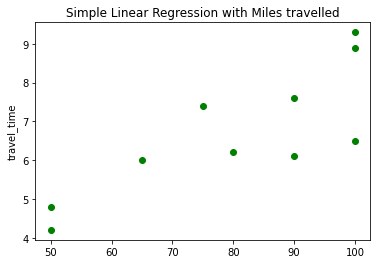

In [5]:
#draw scatter plot
plt.scatter(df1['x1'], df1['travel_time'], color = "g")
plt.ylabel('travel_time')
plt.title('Simple Linear Regression with Miles travelled')

Text(0.5, 1.0, 'Linear Regression with No of Delivaries')

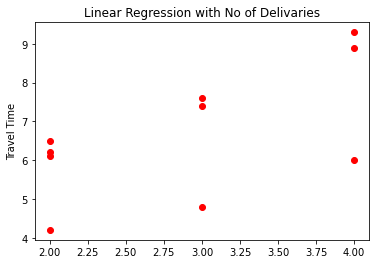

In [6]:
plt.scatter(df1['n_of_deliveries'], df1['travel_time'], color = 'red')
plt.ylabel('Travel Time')
plt.title('Linear Regression with No of Delivaries')

#### We can see there is relationship between indep and dep var, else we wouldn't have to do the regression (if pts were in horizontal manner)

Text(0.5, 0, 'x1 in Green, x2 in Red')

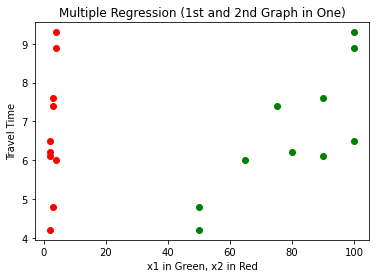

In [7]:
plt.figure()
plt.scatter(df1['x1'], df1['travel_time'], color = "green")
plt.scatter(df1['n_of_deliveries'], df1['travel_time'], color = "red")
plt.ylabel('Travel Time')
plt.title('Multiple Regression (1st and 2nd Graph in One)')
plt.xlabel('x1 in Green, x2 in Red')

<b>1st and 2nd Graph in One

## 1 Ind, 1 Dep Var

In [8]:
Reg1 = ols(formula = 'travel_time ~ x1', data = df1) #travel_time: dep var; x1: indep var
Fit1 = Reg1.fit()
Fit1.summary()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Fri, 11 Mar 2022   Prob (F-statistic):            0.00408
Time:                        07:53:45   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.390      -1.956       4.504
x1             0.0678      0.017      3.977      0.004       0.028       0.107
==============================================================================
Omnibus:                        0.694   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.623
Skew:                          -0.333   Prob(JB):                        0.732
Kurtosis:                       1.974   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>yhat = 1.27 + .0678 x1 <br>
Higher R sq. better is model

In [10]:
anova_lm(Fit1)

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,15.814578,0.00408
Residual,8.0,8.028696,1.003587,NaN,NaN


SST = 15.87 + 8.02 = 23.89 <br>
SSE = 8.02 <br>
SSR = 15.87

## 2 Ind, 1 Dep Var

In [11]:
model = ols('travel_time ~ x1+n_of_deliveries', data = df1).fit() #(dep var ~ ind var + ind var + ind var + ...)
model.summary()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           0.000276
Time:                        07:55:30   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     -0.913      0.392      -3.119       1.381
x1                  0.0611      0.010      6.182      0.000       0.038       0.085
n_of_deliveries     0.9234      0.221      4.176      0.004       0.401       1.446
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.151
Skew:                           0.074   Prob(JB):                        0.927
Kurtosis:                       2.418   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='red'><b>y = -0.8687 + 0.0611 x1 + 0.9234 x2
<br> After adding new var, R sq has increased <br><br>
F-statistic: 32.88 <br>
Prob (F-statistic): 0.00027 < 0.05 (alpha) : Reject Ho, i.e. both indep var are significant at population level, so don't drop any var <br><br>
</b>b1 = 0.611 (x1 coef)<br>
sb1 = 0.01 (x1 std err)<br><br>
b2 = 0.9234 (n_of_del coef)<br>
sb2 = 0.221 (n_of_del std err)<br><br>
t1 = b1/sb1 = 6.18<br>
<b>Looking 0.000 P val (for x1), we have to reject Ho i.e. beta1 != 0: There is relationship bet x1 and dep var y at population level<br><br>
Reject Ho for 2nd var also<hr>

In [12]:
anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


SST = 22<br>
SSE = 2.29 <b> <br>Error has decreased as comp to 1 ind var </b><br>
SSR = 20 <b><br> SSR increased after introducing a variable